In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from skimage import io
from sklearn.preprocessing import StandardScaler

In [2]:
files = glob.glob("./train_input_OWKIN_soqGyb9/train_input/images/*/*")
tile_annotations = pd.read_csv("./train_input_OWKIN_soqGyb9/train_input/train_tile_annotations.csv")

# Part I: Model build on annotated tiles
## Data preprocessing:

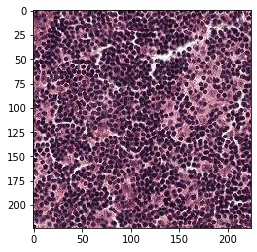

In [3]:
plt.imshow(plt.imread('./train_input_OWKIN_soqGyb9/train_input/images\\ID_001\\ID_001_tile_100_16_74_156.jpg',(224, 224, 3)))

In [4]:
#Getting information from image path
print(files[21210])
print(list(map(lambda x: x.split('\\')[2].split('_'), files))[21210])

./train_input_OWKIN_soqGyb9/train_input/images\ID_035_annotated\ID_035_annotated_tile_0_16_56_117.jpg
['ID', '035', 'annotated', 'tile', '0', '16', '56', '117.jpg']


In [5]:
#Dataframe for images description
train = pd.DataFrame()
train['patient_id'] = list(map(lambda x: x.split('\\')[1], files))
train['tile_id'] = list(map(lambda x: x.split('\\')[2].split('_')[3] if "annotated" not in x.split('\\')[1] else x.split('\\')[2].split('_')[4], files))
train['zoomLevel'] = list(map(lambda x: x.split('\\')[2].split('_')[4]  if "annotated" not in x.split('\\')[1] else x.split('\\')[2].split('_')[5], files))
train['xCoord'] = list(map(lambda x: x.split('\\')[2].split('_')[5]  if "annotated" not in x.split('\\')[1] else x.split('\\')[2].split('_')[6], files))
train['yCoord'] = list(map(lambda x: x.split('\\')[2].split('_')[6].split('.')[0]  if "annotated" not in x.split('\\')[1] else x.split('\\')[2].split('_')[7].split('.')[0], files))
train['image_path'] = files 
train.sample(5)

,patient_id,tile_id,zoomLevel,xCoord,yCoord,image_path
131449,ID_204,619,16,44,196,./train_input_OWKIN_soqGyb9/train_input/images...
69278,ID_113,673,16,20,85,./train_input_OWKIN_soqGyb9/train_input/images...
60212,ID_100,470,16,42,160,./train_input_OWKIN_soqGyb9/train_input/images...
41546,ID_068,47,16,83,100,./train_input_OWKIN_soqGyb9/train_input/images...
133206,ID_206,442,16,86,141,./train_input_OWKIN_soqGyb9/train_input/images...


In [6]:
#Annotated tiles images dataframe
tile_annotations.sample(5)

,file_name,Target
760,ID_387_annotated_tile_760_15_32_70.jpg,0
8606,ID_036_annotated_tile_348_16_35_140.jpg,0
3223,ID_166_annotated_tile_578_15_75_67.jpg,0
1193,ID_243_annotated_tile_193_16_43_143.jpg,0
2453,ID_046_annotated_tile_808_16_18_115.jpg,0


In [8]:
#Get sorted annotated tiles from train dataframe and match them with target variable
train_annotated = train[train['patient_id'].str.contains("annotated")]
train_annotated = train_annotated.sort_values(by = ['image_path'])
y_annotated = list(tile_annotations.sort_values(by=['file_name'])['Target'])
print(len(y_annotated))
train_annotated['target'] = y_annotated 

10124


In [9]:
#train_annotated
train_annotated.sample(5) #annotated data with target variable

,patient_id,tile_id,zoomLevel,xCoord,yCoord,image_path,target
114703,ID_174_annotated,183,16,30,158,./train_input_OWKIN_soqGyb9/train_input/images...,0
22638,ID_036_annotated,606,16,39,126,./train_input_OWKIN_soqGyb9/train_input/images...,0
22001,ID_035_annotated,812,16,38,127,./train_input_OWKIN_soqGyb9/train_input/images...,0
108034,ID_166_annotated,103,15,108,50,./train_input_OWKIN_soqGyb9/train_input/images...,0
114957,ID_174_annotated,411,16,95,121,./train_input_OWKIN_soqGyb9/train_input/images...,0


## Read data:

In [14]:
img = plt.imread('./train_input_OWKIN_soqGyb9/train_input/images\\ID_001\\ID_001_tile_100_16_74_156.jpg',(224, 224, 3))
img.shape

(224, 224, 3)

In [12]:
#Gray Scale
from PIL import Image
img = Image.open('./train_input_OWKIN_soqGyb9/train_input/images\\ID_001\\ID_001_tile_100_16_74_156.jpg').convert('LA')
img_tuple = np.array(img)
img_tuple.shape
img
x, y, z = img_tuple.shape
image_2d = img_tuple.reshape(x*y, z)
print(image_2d.shape)
print(image_2d)
#img.save('greyscale.png')

(50176, 2)
[[122 255]
 [161 255]
 [101 255]
 ...
 [177 255]
 [128 255]
 [122 255]]


In [13]:
#step 5 car c'est grand 50xxx
img = io.imread('./train_input_OWKIN_soqGyb9/train_input/images\\ID_001\\ID_001_tile_100_16_74_156.jpg', as_gray=True)
img = img[::1,::1]
img = img.flatten()
len(img.flatten())#flatten permet d'obtenir un array

50176

In [14]:
def img2vect(img_path):
    #image read grayscale
    img = io.imread(img_path, as_gray=True)
    img = img[::1,::1]
    img = img.flatten()    
    return img

In [15]:
train_annotated.target.value_counts()

0    9417
1     707
Name: target, dtype: int64

In [16]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#700 de chaque label
df = shuffle(train_annotated.groupby('target').apply(lambda s: s.sample(700,random_state=123)).reset_index(drop = True)).reset_index(drop = True)
df.sample(5)

,patient_id,tile_id,zoomLevel,xCoord,yCoord,image_path,target
1168,ID_174_annotated,719,16,60,202,./train_input_OWKIN_soqGyb9/train_input/images...,0
639,ID_046_annotated,773,16,43,109,./train_input_OWKIN_soqGyb9/train_input/images...,1
355,ID_035_annotated,703,16,70,133,./train_input_OWKIN_soqGyb9/train_input/images...,1
1148,ID_174_annotated,282,16,79,141,./train_input_OWKIN_soqGyb9/train_input/images...,1
72,ID_262_annotated,529,16,59,140,./train_input_OWKIN_soqGyb9/train_input/images...,0


In [17]:
from tqdm import tqdm
X = []
for path in tqdm(df.image_path):
    vect = img2vect(path)
    #X = X.append(vect, axis = 0)
    X.append(vect.reshape(1, -1)) 
X = np.concatenate(X, axis = 0)
#matrix of each tile as row
X

100%|██████████████████████████████████████████████████████████████████████████████| 1400/1400 [00:27<00:00, 50.78it/s]


array([[0.85897608, 0.31609529, 0.08358392, ..., 0.04695137, 0.16908549,
        0.03967373],
       [0.96414039, 0.96414039, 0.96414039, ..., 0.52243451, 0.86220431,
        0.90852784],
       [0.82147255, 0.75844471, 0.33518314, ..., 0.26036784, 0.07605412,
        0.1035051 ],
       ...,
       [0.76997922, 0.63745647, 0.65536   , ..., 0.12172118, 0.0920302 ,
        0.34075569],
       [0.21976039, 0.35701529, 0.21976039, ..., 0.90858902, 0.8615302 ,
        0.68505961],
       [0.72105137, 0.63731451, 0.67542902, ..., 0.32039059, 0.76183843,
        0.96072314]])

In [18]:
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [19]:
X_train.shape

(938, 50176)

## Model

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(),PCA(n_components = 100),LogisticRegression()) #100 comp

In [22]:
pipe.fit(X_train,y_train)

C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [23]:
ytrain_pred = pipe.predict_proba(X_train)
ytest_pred = pipe.predict_proba(X_test)

In [24]:
ytrain_pred

array([[0.4218367 , 0.5781633 ],
       [0.55957314, 0.44042686],
       [0.34637688, 0.65362312],
       ...,
       [0.37263759, 0.62736241],
       [0.47090064, 0.52909936],
       [0.34608236, 0.65391764]])

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
roc_auc_score(y_train,ytrain_pred[:,1])

0.6647795481829096

In [27]:
roc_auc_score(y_test,ytest_pred[:,1])

0.5414165666266506

# Conclusion:
En utilisant LogisticRegression: <br/>
Pour step 5: 
- train AUC Score = 67.3%
- test AUC score = 52.4%
<br/>
Pour step 1:<br/>

- train AUC Score = 67.8%
- test AUC score = 52.5%

In [31]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
pipe = make_pipeline(StandardScaler(),PCA(n_components = 100),RandomForestClassifier(n_estimators = 300, max_depth = 3, random_state =123))
pipe.fit(X_train,y_train)
ytrain_pred = pipe.predict_proba(X_train)
ytest_pred = pipe.predict_proba(X_test)
roc_auc_score(y_train,ytrain_pred[:,1])
roc_auc_score(y_test,ytest_pred[:,1])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=3,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=300, n_jobs=None,


0.8952855064557191

0.5994940029985008

In [59]:
from sklearn.model_selection import GridSearchCV

In [32]:
#-----------------------------------------------------------------------------------------------------------------
##  This code for GridCV commented to avoid running time
#-----------------------------------------------------------------------------------------------------------------
pipe = make_pipeline(StandardScaler(),PCA(n_components = 100),GradientBoostingClassifier(n_estimators = 300, max_depth = 3, learning_rate = 0.01, random_state =123))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'gradientboostingclassifier__max_depth': [2,3,4],
    'gradientboostingclassifier__learning_rate': [0.01,0.05,0.1]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,scoring = 'roc_auc', verbose = 1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=100, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(criteri...
                                                                   presort='auto',
                                                              

Best parameter (CV score=0.682):
{'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 3}


In [33]:
#Gradient Boosting Classifier
pipe = make_pipeline(StandardScaler(),PCA(n_components = 100),GradientBoostingClassifier(n_estimators = 300, max_depth = 3, learning_rate = 0.01, random_state =123, verbose=1))
pipe.fit(X_train,y_train)
ytrain_pred = pipe.predict_proba(X_train)
ytest_pred = pipe.predict_proba(X_test)
roc_auc_score(y_train,ytrain_pred[:,1])
roc_auc_score(y_test,ytest_pred[:,1])

      Iter       Train Loss   Remaining Time 
         1           1.3825            2.09s
         2           1.3788            2.38s
         3           1.3752            2.37s
         4           1.3716            2.43s
         5           1.3681            2.41s
         6           1.3647            2.44s
         7           1.3613            2.42s
         8           1.3580            2.36s
         9           1.3548            2.35s
        10           1.3516            2.34s
        20           1.3221            2.04s
        30           1.2971            1.96s
        40           1.2750            1.85s
        50           1.2569            1.72s
        60           1.2404            1.59s
        70           1.2259            1.47s
        80           1.2120            1.37s
        90           1.1990            1.27s
       100           1.1862            1.19s
       200           1.0731            0.54s
       300           0.9848            0.00s


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.01, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            mi

0.9273390616475722

0.6212893553223389

In [35]:
#-----------------------------------------------------------------------------------------------------------------
##  This code for GridCV commented to avoid running time
#-----------------------------------------------------------------------------------------------------------------
pipe = make_pipeline(StandardScaler(),PCA(n_components = 100),
                     xgb.XGBClassifier(alpha = 0.1, n_estimators = 300,max_depth = 3,objective = 'binary:logistic', learning_rate= 0.01, random_state = 123))
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'xgbclassifier__n_estimators': [200,300,400,500],
    'xgbclassifier__max_depth': [2,3,4],
    'xgbclassifier__learning_rate': [0.01,0.05,0.1]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,scoring = 'roc_auc', verbose = 1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  5.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=100, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('xgbclassifier',
                                        XGBClassifier(alpha=0.1, base_score=0.5,
                                                      booster=...
                                                      reg_alpha=0, reg_lambda=1,
        

Best parameter (CV score=0.689):
{'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 200}


In [34]:
#XGBoost
import xgboost as xgb

steps = 20  # The number of training iterations
pipe = make_pipeline(StandardScaler(),PCA(n_components = 100),
                     xgb.XGBClassifier(alpha = 0.1,n_estimators = 400,max_depth = 3,objective = 'binary:logistic', learning_rate= 0.01, random_state = 123))
pipe.fit(X_train,y_train)
ytrain_pred = pipe.predict_proba(X_train)
ytest_pred = pipe.predict_proba(X_test)
roc_auc_score(y_train,ytrain_pred[:,1])
roc_auc_score(y_test,ytest_pred[:,1])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('xgbclassifier',
                 XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=400, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=123,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silen

0.9356246590289143

0.6194808845577212

# Conclusion:
En utilisant RandomForestClassifier: <br/>
Pour n_estim 300, max_depth 3: 
- train AUC Score = 89%
- test AUC score = 68%


En utilisant GradientBoostingClassifier: <br/>
Pour n_estim 300, max_depth 3, learning_rate 0.01: <br/>

- train AUC Score = 92.9%
- test AUC score = 67%

En utilisant GradientBostingClassifier: <br/>
Pour n_estim 300, max_depth 3, learning_rate 0.01, alpha 0.1: <br/>

- train AUC Score = 92.5%
- test AUC score = 67%

# Using ResNet on annotated patients:

In [28]:
ResNet_files = glob.glob("./train_input_OWKIN_soqGyb9/train_input/resnet_features/*")
matrix = np.load(ResNet_files[0])

In [36]:
#extract annotated files
annotated_patients = [s for s in ResNet_files if "annotated" in s]
def get_patient_matrix(path):
    #get matrix of these patients
    ID = path.split('\\')[1].split('.')[0]
    tiles_index = train_annotated[train_annotated.patient_id == ID].tile_id
    matrix = np.load(path)
    matrix = np.delete(matrix,[0,1,2],axis = 1)
    #tiles_index.values.astype(int)
    #matrix[tiles_index.values.astype(int)]
    y_annotated = train_annotated[train_annotated.patient_id == ID].target.astype(int)
    y_annotated = np.array(y_annotated).reshape(-1,1)
    matrix = np.hstack((matrix,y_annotated))
    return matrix

matrix = np.array([])
for path in annotated_patients:
    mat = get_patient_matrix(path)
#     matrix = np.vstack([matrix, mat]) 
    matrix = np.vstack([matrix, mat]) if matrix.size else mat

In [37]:
matrix.shape

(10124, 2049)

In [38]:
np.count_nonzero(matrix[:,-1] == 1)

707

In [39]:
X1 = matrix[matrix[:,-1] == 1]
X0 = matrix[matrix[:,-1] == 0][np.random.randint(len(matrix[matrix[:,-1] == 0]), size=707),:]
X = np.vstack([X1,X0])
#np.random.shuffle(X)
X = shuffle(X)
print(X.shape)
print(np.count_nonzero(X[:,-1] == 0))

(1414, 2049)
707


In [40]:
y = X[:,-1]
X = np.delete(X,-1,axis = 1) #delete target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123) #pay attention for % of categories
print(X_train.shape)
print(y_train.shape)

(947, 2048)
(947,)


In [43]:
#-----------------------------------------------------------------------------------------------------------------
##  This code for GridCV commented to avoid running time
#-----------------------------------------------------------------------------------------------------------------
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state =123))
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'randomforestclassifier__n_estimators': [200,300,400],
    'randomforestclassifier__max_depth': [2,3,4]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,scoring = 'roc_auc', verbose = 1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    6.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=3,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_dec

Best parameter (CV score=0.802):
{'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 300}


In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators = 400, max_depth = 4, random_state =123))
pipe.fit(X_train,y_train)
ytrain_pred = pipe.predict_proba(X_train)
ytest_pred = pipe.predict_proba(X_test)
print(roc_auc_score(y_train,ytrain_pred[:,1]))
print(roc_auc_score(y_test,ytest_pred[:,1]))

0.7984042553191488

In [45]:
#-----------------------------------------------------------------------------------------------------------------
##  This code for GridCV commented to avoid running time
#-----------------------------------------------------------------------------------------------------------------
pipe = make_pipeline(StandardScaler(), xgb.XGBClassifier(alpha = 0.1, n_estimators = 300,max_depth = 4,objective = 'binary:logistic', learning_rate= 0.01, random_state = 123))
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'xgbclassifier__n_estimators': [200,300,400],
    'xgbclassifier__max_depth': [2,3,4],
    'xgbclassifier__learning_rate': [0.01,0.05,0.1]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,scoring = 'roc_auc', verbose = 1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  6.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('xgbclassifier',
                                        XGBClassifier(alpha=0.1, base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.01,
                                                      max_del

Best parameter (CV score=0.807):
{'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 200}


In [50]:
#XGBoost
import xgboost as xgb

pipe = make_pipeline(StandardScaler(), xgb.XGBClassifier(alpha = 0.01,n_estimators = 200,max_depth = 4,objective = 'binary:logistic', learning_rate= 0.05, random_state = 123))
pipe.fit(X_train,y_train)
ytrain_pred = pipe.predict_proba(X_train)
ytest_pred = pipe.predict_proba(X_test)
print(roc_auc_score(y_train,ytrain_pred[:,1]))
print(roc_auc_score(y_test,ytest_pred[:,1]))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.05,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=123,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

1.0

0.805309896884518

# Patient prediction:

In [42]:
output = pd.read_csv('./train_input_OWKIN_soqGyb9/training_output_bis_EyawEvU.csv')
#output

In [43]:
def get_patient_probabilities(path):
    matrix = np.load(path)
    matrix = np.delete(matrix,[0,1,2],axis = 1)
    y_pred = pipe.predict_proba(matrix)[:,1]
    return y_pred

In [69]:
data = np.array([])
#build matrix of probabilities if each patient in a row with its target variable
for path in tqdm(ResNet_files):
    tiles_prob = []
    #len(get_patient_probabilities(path))
    tiles_prob = list(get_patient_probabilities(path))
    if len(tiles_prob)<1000:
        if len(tiles_prob)<=700:
            continue
        else:
            tiles_prob.extend([np.mean(tiles_prob)]*(1000-len(tiles_prob)))
    #len(tiles_prob)
    if "annotated" not in path:
        ID = int(path.split('ID_')[1].split('.')[0])
    else:
        ID = int(path.split('ID_')[1].split('.')[0].split('_')[0])
    y = output[output.ID == ID].Target
    tiles_prob.extend(y)
    #tiles_prob
    data = np.vstack([data, np.array(tiles_prob)]) if data.size else np.array(tiles_prob)
data.shape

100%|████████████████████████████████████████████████████████████████████████████████| 279/279 [01:00<00:00,  5.13it/s]


(240, 1001)

In [70]:
pd.DataFrame(data).sample(5)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
7,0.421309,0.324834,0.344498,0.273470,0.238431,0.278713,0.465816,0.336237,0.472176,0.472607,...,0.323353,0.458082,0.317775,0.560754,0.288111,0.463908,0.472344,0.270067,0.572407,0.0
161,0.450182,0.425194,0.504469,0.476174,0.386995,0.461179,0.467531,0.520732,0.548074,0.349564,...,0.569387,0.417787,0.465537,0.410941,0.496461,0.468428,0.461245,0.440566,0.447276,0.0
89,0.435444,0.564553,0.499328,0.528980,0.412670,0.482196,0.489695,0.482188,0.392168,0.521268,...,0.540882,0.475823,0.513664,0.495879,0.517761,0.505437,0.438637,0.502777,0.441192,1.0
6,0.534622,0.532525,0.501361,0.293159,0.442613,0.609186,0.208896,0.191119,0.463123,0.152237,...,0.518556,0.208139,0.224402,0.414885,0.548836,0.272198,0.230133,0.435345,0.225168,1.0
208,0.545566,0.556256,0.569837,0.222362,0.568528,0.703201,0.199810,0.576093,0.627343,0.657902,...,0.500590,0.521350,0.443043,0.516481,0.548419,0.275357,0.241517,0.592390,0.175131,0.0


### Solution1: build model that predict y based on tiles probabilities:

In [71]:
y = data[:,-1]
X = np.delete(data,-1,axis = 1) #delete target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123) #pay attention for % of categories
X_train.shape

(160, 1000)

In [60]:
#-----------------------------------------------------------------------------------------------------------------
##  This code for GridCV commented to avoid running time
#-----------------------------------------------------------------------------------------------------------------
rf= RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state =123)
param_grid = {
    'n_estimators': [10,150,200,300],
    'max_depth': [1,2,3,4]
}
search = GridSearchCV(rf, param_grid, n_jobs=-1,scoring = 'roc_auc', verbose = 1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    8.6s finished
C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameter (CV score=0.648):
{'max_depth': 1, 'n_estimators': 300}


In [72]:
rf= RandomForestClassifier(n_estimators = 300, max_depth = 1, random_state =123)
rf.fit(X_train,y_train)
ytrain_pred = rf.predict_proba(X_train)
ytest_pred = rf.predict_proba(X_test)
print(roc_auc_score(y_train,ytrain_pred[:,1]))
print(roc_auc_score(y_test,ytest_pred[:,1]))

0.8393650793650793
0.6096794468887493


In [48]:
logReg = LogisticRegression(penalty='l2',C= 1e10,random_state=123)
logReg.fit(X_train,y_train)
ytrain_pred = logReg.predict_proba(X_train)
ytest_pred = logReg.predict_proba(X_test)
roc_auc_score(y_train,ytrain_pred[:,1])
roc_auc_score(y_test,ytest_pred[:,1])

C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4404591104734577

### Solution2: predict y based on tiles probabilities stats:

In [84]:
#Descriptive analysis of the results and solve the problem of teest prediction !!!! (you know the prob)
stats =pd.DataFrame()
stats['count'] = list(map(lambda x: len(x), X))
stats['mean']= list(map(lambda x: x.mean(), X))
stats['median'] = list(map(lambda x: np.mean(x), X))
stats['max'] = list(map(lambda x: np.max(x), X))
stats['min'] = list(map(lambda x: np.min(x[x>0.5]), X))
stats['count_>0.5'] = list(map(lambda x: len(x[x>0.5]), X))
stats['mean_>0.5'] = list(map(lambda x: np.mean(x[x>0.5]), X))
#stats['difference'] = (stats['max'] - stats['min'])/stats['mean_>0.5']
stats['target'] = y
stats['target_predicted'] = (stats['count_>0.5'] > 170).astype(int)

In [85]:
stats.groupby('target')['count_>0.5'].mean()
#Bizarre biaise au niveau des 1

target
0.0    134.789474
1.0    210.065421
Name: count_>0.5, dtype: float64

In [86]:
x = (stats['count_>0.5'] - 170)/40
stats['target_predicted_proba'] = 1 / (1 + np.exp(-x))

In [88]:
stats.sample(20)

,count,mean,median,max,min,count_>0.5,mean_>0.5,target,target_predicted,target_predicted_proba
224,1000,0.251965,0.251965,0.610010,0.500064,25,0.538328,0.0,0,0.025957
204,1000,0.545551,0.545551,0.779020,0.500484,697,0.598538,1.0,1,0.999998
179,1000,0.420494,0.420494,0.601977,0.500597,117,0.527704,0.0,0,0.209988
141,1000,0.438098,0.438098,0.676931,0.500023,349,0.551975,1.0,1,0.988738
40,1000,0.307659,0.307659,0.639125,0.501623,70,0.536116,0.0,0,0.075858
191,1000,0.487239,0.487239,0.749877,0.500166,526,0.591493,1.0,1,0.999864
57,1000,0.325039,0.325039,0.674409,0.500778,84,0.543645,0.0,0,0.104331
214,1000,0.396795,0.396795,0.691036,0.500069,223,0.546736,1.0,1,0.790012
207,1000,0.445548,0.445548,0.596607,0.500014,177,0.525210,0.0,1,0.543639
56,1000,0.493034,0.493034,0.784258,0.501362,539,0.625998,1.0,1,0.999901


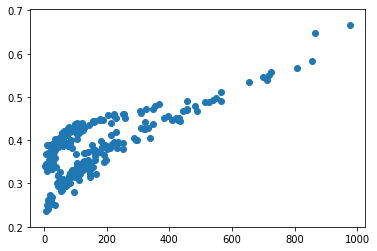

In [89]:
plt.scatter(stats['count_>0.5'],stats['mean'])

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(stats.target,stats.target_predicted))
confusion_matrix(stats.target,stats.target_predicted)

0.5875


array([[100,  33],
       [ 66,  41]], dtype=int64)

## Embeddings (ResNet on each patient):

In [190]:
#Modeeel
data = np.array([])
patients = []
for path in tqdm(ResNet_files):
    matrix = np.load(path)
    matrix = np.delete(matrix,[0,1,2],axis = 1) 
    patient_weights = list(np.sum(matrix,axis=0))
    if len(patient_weights)<1000:
        continue
    if "annotated" not in path:
        ID = int(path.split('ID_')[1].split('.')[0])
    else:
        ID = int(path.split('ID_')[1].split('.')[0].split('_')[0])
    y = output[output.ID == ID].Target
    patient_weights.extend(y)
    data = np.vstack([data, np.array(patient_weights)]) if data.size else np.array(patient_weights)
data.shape

  0%|                                                                                          | 0/279 [00:00<?, ?it/s]

2048

2048

2048

  1%|▉                                                                                 | 3/279 [00:00<00:12, 21.33it/s]

2048

2048

2048

  2%|█▊                                                                                | 6/279 [00:00<00:12, 21.80it/s]

2048

2048

2048

  3%|██▋                                                                               | 9/279 [00:00<00:11, 22.71it/s]

2048

2048

2048

  4%|███▍                                                                             | 12/279 [00:00<00:11, 22.63it/s]

2048

2048

2048

  5%|████▎                                                                            | 15/279 [00:00<00:10, 24.39it/s]

2048

2048

2048

  6%|█████▏                                                                           | 18/279 [00:00<00:11, 23.55it/s]

2048

2048

2048

  8%|██████                                                                           | 21/279 [00:00<00:10, 24.21it/s]

2048

2048

2048

  9%|██████▉                                                                          | 24/279 [00:01<00:11, 22.85it/s]

2048

2048

2048

 10%|███████▊                                                                         | 27/279 [00:01<00:11, 22.37it/s]

2048

2048

2048

 11%|████████▋                                                                        | 30/279 [00:01<00:11, 22.29it/s]

2048

2048

2048

 12%|█████████▌                                                                       | 33/279 [00:01<00:11, 22.19it/s]

2048

2048

2048

 13%|██████████▍                                                                      | 36/279 [00:01<00:10, 22.51it/s]

2048

2048

2048

 14%|███████████▎                                                                     | 39/279 [00:01<00:10, 22.58it/s]

2048

2048

2048

2048

 15%|████████████▍                                                                    | 43/279 [00:01<00:09, 24.66it/s]

2048

2048

2048

 16%|█████████████▎                                                                   | 46/279 [00:01<00:09, 24.82it/s]

2048

2048

2048

 18%|██████████████▏                                                                  | 49/279 [00:02<00:09, 24.41it/s]

2048

2048

2048

 19%|███████████████                                                                  | 52/279 [00:02<00:09, 24.01it/s]

2048

2048

2048

 20%|███████████████▉                                                                 | 55/279 [00:02<00:08, 25.11it/s]

2048

2048

2048

 21%|████████████████▊                                                                | 58/279 [00:02<00:08, 26.28it/s]

2048

2048

2048

 22%|█████████████████▋                                                               | 61/279 [00:02<00:08, 25.64it/s]

2048

2048

2048

 23%|██████████████████▌                                                              | 64/279 [00:02<00:08, 24.24it/s]

2048

2048

2048

2048

 24%|███████████████████▋                                                             | 68/279 [00:02<00:08, 25.85it/s]

2048

2048

2048

 25%|████████████████████▌                                                            | 71/279 [00:02<00:08, 24.85it/s]

2048

2048

2048

 27%|█████████████████████▍                                                           | 74/279 [00:03<00:08, 24.31it/s]

2048

2048

2048

 28%|██████████████████████▎                                                          | 77/279 [00:03<00:08, 24.17it/s]

2048

2048

2048

 29%|███████████████████████▏                                                         | 80/279 [00:03<00:08, 22.91it/s]

2048

2048

2048

 30%|████████████████████████                                                         | 83/279 [00:03<00:09, 21.29it/s]

2048

2048

2048

 31%|████████████████████████▉                                                        | 86/279 [00:03<00:09, 21.08it/s]

2048

2048

2048

 32%|█████████████████████████▊                                                       | 89/279 [00:03<00:08, 21.85it/s]

2048

2048

2048

 33%|██████████████████████████▋                                                      | 92/279 [00:03<00:08, 22.22it/s]

2048

2048

2048

 34%|███████████████████████████▌                                                     | 95/279 [00:04<00:08, 22.19it/s]

2048

2048

2048

 35%|████████████████████████████▍                                                    | 98/279 [00:04<00:08, 21.55it/s]

2048

2048

2048

 36%|████████████████████████████▉                                                   | 101/279 [00:04<00:08, 21.98it/s]

2048

2048

2048

 37%|█████████████████████████████▊                                                  | 104/279 [00:04<00:08, 21.83it/s]

2048

2048

2048

 38%|██████████████████████████████▋                                                 | 107/279 [00:04<00:07, 21.82it/s]

2048

2048

2048

 39%|███████████████████████████████▌                                                | 110/279 [00:04<00:07, 22.15it/s]

2048

2048

2048

 41%|████████████████████████████████▍                                               | 113/279 [00:04<00:07, 21.77it/s]

2048

2048

2048

 42%|█████████████████████████████████▎                                              | 116/279 [00:04<00:07, 22.46it/s]

2048

2048

2048

 43%|██████████████████████████████████                                              | 119/279 [00:05<00:07, 22.16it/s]

2048

2048

2048

 44%|██████████████████████████████████▉                                             | 122/279 [00:05<00:07, 21.76it/s]

2048

2048

2048

 45%|███████████████████████████████████▊                                            | 125/279 [00:05<00:07, 20.87it/s]

2048

2048

2048

 46%|████████████████████████████████████▋                                           | 128/279 [00:05<00:07, 21.14it/s]

2048

2048

2048

 47%|█████████████████████████████████████▌                                          | 131/279 [00:05<00:06, 22.58it/s]

2048

2048

2048

 48%|██████████████████████████████████████▍                                         | 134/279 [00:05<00:06, 22.85it/s]

2048

2048

2048

 49%|███████████████████████████████████████▎                                        | 137/279 [00:05<00:06, 21.86it/s]

2048

2048

2048

 50%|████████████████████████████████████████▏                                       | 140/279 [00:06<00:06, 23.05it/s]

2048

2048

2048

 51%|█████████████████████████████████████████                                       | 143/279 [00:06<00:06, 22.63it/s]

2048

2048

2048

 52%|█████████████████████████████████████████▊                                      | 146/279 [00:06<00:06, 21.24it/s]

2048

2048

2048

 53%|██████████████████████████████████████████▋                                     | 149/279 [00:06<00:05, 21.77it/s]

2048

2048

2048

2048

 55%|███████████████████████████████████████████▊                                    | 153/279 [00:06<00:05, 24.14it/s]

2048

2048

2048

 56%|████████████████████████████████████████████▋                                   | 156/279 [00:06<00:05, 23.58it/s]

2048

2048

2048

 57%|█████████████████████████████████████████████▌                                  | 159/279 [00:06<00:05, 22.33it/s]

2048

2048

2048

 58%|██████████████████████████████████████████████▍                                 | 162/279 [00:07<00:05, 21.46it/s]

2048

2048

2048

 59%|███████████████████████████████████████████████▎                                | 165/279 [00:07<00:05, 21.41it/s]

2048

2048

2048

 60%|████████████████████████████████████████████████▏                               | 168/279 [00:07<00:05, 20.72it/s]

2048

2048

2048

 61%|█████████████████████████████████████████████████                               | 171/279 [00:07<00:05, 20.05it/s]

2048

2048

2048

 62%|█████████████████████████████████████████████████▉                              | 174/279 [00:07<00:05, 19.42it/s]

2048

2048

2048

 63%|██████████████████████████████████████████████████▊                             | 177/279 [00:07<00:05, 20.15it/s]

2048

2048

2048

 65%|███████████████████████████████████████████████████▌                            | 180/279 [00:07<00:04, 20.45it/s]

2048

2048

2048

 66%|████████████████████████████████████████████████████▍                           | 183/279 [00:08<00:04, 20.58it/s]

2048

2048

2048

 67%|█████████████████████████████████████████████████████▎                          | 186/279 [00:08<00:04, 19.58it/s]

2048

2048

2048

 68%|██████████████████████████████████████████████████████▏                         | 189/279 [00:08<00:04, 20.70it/s]

2048

2048

2048

 69%|███████████████████████████████████████████████████████                         | 192/279 [00:08<00:04, 20.09it/s]

2048

2048

2048

 70%|███████████████████████████████████████████████████████▉                        | 195/279 [00:08<00:03, 21.13it/s]

2048

2048

2048

 71%|████████████████████████████████████████████████████████▊                       | 198/279 [00:08<00:03, 20.67it/s]

2048

2048

2048

 72%|█████████████████████████████████████████████████████████▋                      | 201/279 [00:08<00:03, 20.35it/s]

2048

2048

2048

2048

 73%|██████████████████████████████████████████████████████████▊                     | 205/279 [00:09<00:03, 22.17it/s]

2048

2048

2048

 75%|███████████████████████████████████████████████████████████▋                    | 208/279 [00:09<00:03, 23.02it/s]

2048

2048

2048

 76%|████████████████████████████████████████████████████████████▌                   | 211/279 [00:09<00:02, 23.16it/s]

2048

2048

2048

 77%|█████████████████████████████████████████████████████████████▎                  | 214/279 [00:09<00:02, 22.39it/s]

2048

2048

2048

 78%|██████████████████████████████████████████████████████████████▏                 | 217/279 [00:09<00:02, 21.92it/s]

2048

2048

2048

 79%|███████████████████████████████████████████████████████████████                 | 220/279 [00:09<00:02, 21.01it/s]

2048

2048

2048

 80%|███████████████████████████████████████████████████████████████▉                | 223/279 [00:09<00:02, 20.49it/s]

2048

2048

2048

 81%|████████████████████████████████████████████████████████████████▊               | 226/279 [00:10<00:02, 20.40it/s]

2048

2048

2048

 82%|█████████████████████████████████████████████████████████████████▋              | 229/279 [00:10<00:02, 20.55it/s]

2048

2048

2048

 83%|██████████████████████████████████████████████████████████████████▌             | 232/279 [00:10<00:02, 20.33it/s]

2048

2048

2048

 84%|███████████████████████████████████████████████████████████████████▍            | 235/279 [00:10<00:02, 20.38it/s]

2048

2048

2048

 85%|████████████████████████████████████████████████████████████████████▏           | 238/279 [00:10<00:02, 19.84it/s]

2048

2048

 86%|████████████████████████████████████████████████████████████████████▊           | 240/279 [00:10<00:01, 19.86it/s]

2048

2048

2048

 87%|█████████████████████████████████████████████████████████████████████▋          | 243/279 [00:10<00:01, 20.83it/s]

2048

2048

2048

 88%|██████████████████████████████████████████████████████████████████████▌         | 246/279 [00:11<00:01, 20.46it/s]

2048

2048

2048

 89%|███████████████████████████████████████████████████████████████████████▍        | 249/279 [00:11<00:01, 20.29it/s]

2048

2048

2048

 90%|████████████████████████████████████████████████████████████████████████▎       | 252/279 [00:11<00:01, 20.24it/s]

2048

2048

2048

2048

 92%|█████████████████████████████████████████████████████████████████████████▍      | 256/279 [00:11<00:01, 22.13it/s]

2048

2048

2048

 93%|██████████████████████████████████████████████████████████████████████████▎     | 259/279 [00:11<00:00, 20.42it/s]

2048

2048

2048

 94%|███████████████████████████████████████████████████████████████████████████▏    | 262/279 [00:11<00:00, 19.58it/s]

2048

2048

2048

 95%|███████████████████████████████████████████████████████████████████████████▉    | 265/279 [00:12<00:00, 20.52it/s]

2048

2048

2048

 96%|████████████████████████████████████████████████████████████████████████████▊   | 268/279 [00:12<00:00, 20.19it/s]

2048

2048

2048

 97%|█████████████████████████████████████████████████████████████████████████████▋  | 271/279 [00:12<00:00, 19.70it/s]

2048

2048

 98%|██████████████████████████████████████████████████████████████████████████████▎ | 273/279 [00:12<00:00, 19.25it/s]

2048

2048

2048

 99%|███████████████████████████████████████████████████████████████████████████████▏| 276/279 [00:12<00:00, 21.40it/s]

2048

2048

2048

100%|████████████████████████████████████████████████████████████████████████████████| 279/279 [00:12<00:00, 20.93it/s]


(279, 2049)

In [191]:
pd.DataFrame(data).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,473.614313,249.275293,626.542980,4.206976,464.130247,46.635348,74.688083,6.540275,12.885891,14.121906,...,53.929963,141.570082,61.915193,58.724161,19.599894,6.048368,116.802592,116.432029,126.930858,0.0
1,724.339659,502.330784,122.475904,19.726494,554.415506,158.298474,106.534941,15.037858,69.173299,12.683546,...,169.630536,56.268936,89.049319,130.964681,15.779767,44.123036,706.632659,343.336312,56.942142,0.0
2,603.994779,319.751957,270.541474,13.822362,464.886054,96.518902,61.145074,26.390978,24.521504,4.452206,...,128.631716,106.516326,60.898800,89.546670,20.306815,14.476504,419.716067,262.068679,87.210592,0.0
3,222.597537,358.178111,263.115658,8.788869,325.246693,60.189164,42.178623,13.120260,22.937949,11.908156,...,105.344463,123.548005,72.725823,113.644956,16.149320,9.130059,209.900223,198.613006,91.528070,0.0
4,339.790235,533.781446,372.198085,17.761909,535.206095,105.837277,69.637015,13.323767,36.129364,11.896046,...,111.377288,147.031479,128.849363,103.194770,33.131964,26.811080,347.262704,329.943100,136.719864,0.0
5,474.819982,342.515386,231.371950,11.847456,368.597115,148.525628,93.169056,6.397171,43.591861,15.070770,...,70.005131,63.453050,79.629528,113.722556,35.037125,19.692931,429.673164,329.505298,124.656867,0.0
6,261.328213,420.480840,445.758234,11.151203,368.503479,52.036947,37.807827,14.172169,21.658744,14.061942,...,61.989728,150.824016,128.905402,94.798402,40.170690,12.844384,250.771771,167.464374,179.354684,1.0
7,526.785823,517.213009,189.621831,11.818585,425.893425,138.523181,83.508622,16.950392,69.382123,7.404473,...,155.423233,49.316890,76.897614,201.195447,19.657460,30.981595,816.471079,378.429684,110.472879,0.0
8,237.021585,156.416497,227.289170,5.714944,149.274834,24.574218,19.583215,2.035894,3.818040,7.932753,...,23.428208,57.172078,28.445293,38.958189,9.727771,3.376139,52.377944,42.587298,85.387802,1.0
9,316.318121,345.823574,276.329328,14.307803,433.902958,103.839536,52.854123,15.293790,35.147747,20.898600,...,93.031543,123.058223,72.250786,136.933602,35.306280,10.933893,350.349715,250.516297,113.332888,0.0


In [192]:
y = data[:,-1]
X = np.delete(data,-1,axis = 1) #delete target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123) #pay attention for % of categories
X_train.shape

(279, 2048)

(186, 2048)

(186,)

In [194]:
#-----------------------------------------------------------------------------------------------------------------
##  This code for GridCV commented to avoid running time
#-----------------------------------------------------------------------------------------------------------------
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state =123))
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'randomforestclassifier__n_estimators': [200,300,400],
    'randomforestclassifier__max_depth': [2,3,4]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,scoring = 'roc_auc', verbose = 1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    8.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=3,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_dec

Best parameter (CV score=0.694):
{'randomforestclassifier__max_depth': 3, 'randomforestclassifier__n_estimators': 200}


In [227]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state =123))
pipe.fit(X_train,y_train)
ytrain_pred = pipe.predict_proba(X_train)
ytest_pred = pipe.predict_proba(X_test)
roc_auc_score(y_train,ytrain_pred[:,1])
roc_auc_score(y_test,ytest_pred[:,1])

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=3,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

0.9947612085769981

0.7278301886792452

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
##  This code for GridCV commented to avoid running time
#-----------------------------------------------------------------------------------------------------------------
pipe = make_pipeline(StandardScaler(), xgb.XGBClassifier(alpha = 0.1, n_estimators = 300,max_depth = 4,objective = 'binary:logistic', learning_rate= 0.01, random_state = 123))
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'xgbclassifier__n_estimators': [200,300,400],
    'xgbclassifier__max_depth': [2,3,4],
    'xgbclassifier__learning_rate': [0.01,0.05,0.1]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,scoring = 'roc_auc', verbose = 1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

In [241]:
#XGBoost
from sklearn.preprocessing import Normalizer
import xgboost as xgb

pipe = make_pipeline(Normalizer(), xgb.XGBClassifier(alpha = 0.01,n_estimators = 400,max_depth = 2,objective = 'binary:logistic', learning_rate= 0.1, random_state = 123))
pipe.fit(X_train,y_train)
ytrain_pred = pipe.predict_proba(X_train)
ytest_pred = pipe.predict_proba(X_test)
roc_auc_score(y_train,ytrain_pred[:,1])
roc_auc_score(y_test,ytest_pred[:,1])

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('xgbclassifier',
                 XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=None,
                               n_estimators=400, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=123,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

1.0

0.6915094339622642

## Stacking: 

In [294]:
# Classifiers
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.classifier import StackingCVClassifier # stacking

In [295]:
# Initializing XGB classifier
classifier1 = xgb.XGBClassifier(alpha = 0.01,n_estimators = 400,max_depth = 2,objective = 'binary:logistic', learning_rate= 0.1, random_state = 123)


# Initializing SVC classifier
classifier2 = SVC(random_state=123,probability=True) #Some modifications should be done to this one

# Initialing LinearDiscriminantAnalysis classifier
classifier3 = LinearDiscriminantAnalysis()

# Initializing Random Forest classifier
classifier4 = RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state =123)

In [301]:
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = LogisticRegression())

In [302]:
# Create list to store classifiers
classifiers = {"XGBC": classifier1,
               "SVC": classifier2,
               "LDA": classifier3,
               "RF": classifier4,
               "Stack": sclf}

In [303]:
# Train classifiers
for key in tqdm(classifiers):
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


 20%|████████████████▊                                                                   | 1/5 [00:13<00:53, 13.40s/it]C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=123,
    shrinking=True, tol=0.001, verbose=False)


 40%|█████████████████████████████████▌                                                  | 2/5 [00:14<00:28,  9.63s/it]C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:14<00:13,  6.78s/it]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:14<00:04,  4.93s/it]C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\L.Badr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warni

StackingCVClassifier(classifiers=[XGBClassifier(alpha=0.01, base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                                learning_rate=0.1,
                                                max_delta_step=0, max_depth=2,
                                                min_child_weight=1,
                                                missing=None, n_estimators=400,
                                                n_jobs=1, nthread=None,
                                                objective='binary:logistic',
                                                random_state=123, reg_alpha=0,
                                                reg_lambda=1,
                                                scale...
   


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:28<00:00, 25.46s/it]

In [304]:
# Get results
results = pd.DataFrame()
for key in tqdm(classifiers):
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.60it/s]

Text(0.05, 0.95, 'AUC: 0.752')

Text(0.5, 1.0, 'XGBC Distribution')

(0, 1)

Text(0.5, 0, 'Probability')

Text(0.05, 0.95, 'AUC: 0.500')

Text(0.5, 1.0, 'SVC Distribution')

(0, 1)

Text(0.5, 0, 'Probability')

Text(0.05, 0.95, 'AUC: 0.610')

Text(0.5, 1.0, 'LDA Distribution')

(0, 1)

Text(0.5, 0, 'Probability')

Text(0.05, 0.95, 'AUC: 0.747')

Text(0.5, 1.0, 'RF Distribution')

(0, 1)

Text(0.5, 0, 'Probability')

Text(0.05, 0.95, 'AUC: 0.742')

Text(0.5, 1.0, 'Stack Distribution')

(0, 1)

Text(0.5, 0, 'Probability')

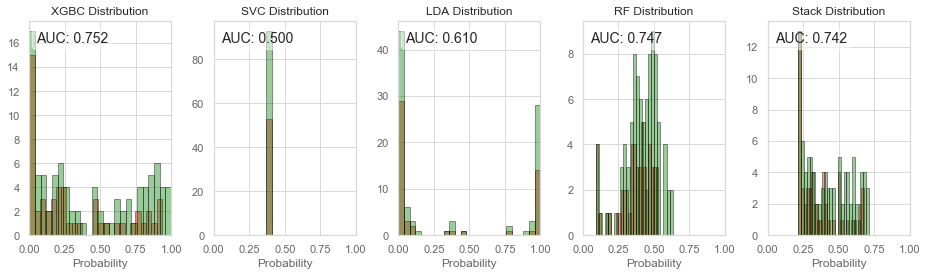

In [305]:
import seaborn as sns
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)